<a href="https://colab.research.google.com/github/zlximon/Tensorflow_DL/blob/master/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#downloading helper functions 
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2022-07-15 07:01:58--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-07-15 07:01:58 (81.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [100]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys
import numpy as np


#get text dataset

In [3]:
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2022-07-15 07:02:01--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2022-07-15 07:02:01 (150 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



  #visualizing text dataset

In [4]:
import pandas as pd 

In [5]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
train_df.head()
# 1 is for disaster 

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train_df_shuffled=train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [7]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [9]:
len(train_df),len(test_df)

(7613, 3263)

In [10]:
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (not real disaster)
Text:
'Snowstorm' 36'x36' oil on canvas (2009) http://t.co/RCZAlRU05o #art #painting

---

Target: 0 (not real disaster)
Text:
-  Pandemonium In Aba As Woman Delivers Baby Without Face http://t.co/36GccAPaak http://t.co/nqjZS6wkuN

---

Target: 0 (not real disaster)
Text:
the stars are burning i here your voice in my mind

---

Target: 0 (not real disaster)
Text:
@cyclone_reizei If I may ask Cyclone-sama have you read Jailed Fate by Rindou?

---

Target: 0 (not real disaster)
Text:
Back in Ireland v. sad/traumatised as is freezing and not beautiful Parisian summer to which have become accustomed.

---



#split data into training and validation  sets

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_sentences,val_sentences,train_labels,val_labels=train_test_split(train_df_shuffled["text"].to_numpy(),train_df_shuffled["target"],test_size=0.1,
                                                                       random_state=42)

In [13]:
len(train_sentences),len(val_sentences),len(train_labels),len(val_labels)

(6851, 762, 6851, 762)

In [14]:
train_sentences[:10],train_labels[:10 ]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), 5921    0


Embedding : create a matrix of features vector for each token 

#text vectorization ( tokenization)

In [15]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [16]:
text_vectorizer=TextVectorization(max_tokens=None# how many word in vocalubary  and None means there is no cap 
                                  ,standardize="lower_and_strip_punctuation",# turn all words to lower case and strip 
                                  split="whitespace",ngrams=None,output_mode="int",output_sequence_length=None,# how long do we want sequences be 
                                 )# pad_to_max_tokens=True)#add zeros into end of short lenght 

In [17]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (automatically add <OOV>)
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None # how long do you want your sequences to be?
                                    )

In [18]:
#find the average numbers of tokens
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))


15

In [19]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [20]:
# fit the text vectorization to the training text
text_vectorizer.adapt(train_sentences)


In [21]:
#create a sample 
sample="There is a flood in my street"
text_vectorizer([sample])


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 74,   9,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [22]:
#choose a random sentence from training dataset
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
        \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
Latest : Trains derailment: 'It's the freakiest of freak accidents' - The Indian Express: The Indi... http://t.co/sjXLlzOSW7 #IndianNews        

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 194,  757,  306,   37,    2, 1850,    6, 1290, 1723,    2, 1282,
        1412,    2, 5372,    1]])>

In [23]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # the most common words in the vocab
bottom_5_words = words_in_vocab[-5:] # the least common words in the vocab
print(f"Most common words in vocab: {top_5_words}")
print(f"Least common words in vocab: {bottom_5_words}")

Most common words in vocab: ['', '[UNK]', 'the', 'a', 'in']
Least common words in vocab: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


#creating Embedding layer 

Embedding : turns positives integers into dense vectors of fixed size
parameters for our embedding

1-input_dim - The size of the vocabulary

2-output_dim - The size of the output embedding vector, for example, a value of 100 outputs a feature vector of size 100 for each word.

3-embeddings_initializer - How to initialize the embeddings matrix, default is "uniform" which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.

4- input_length - Length of sequences being passed to embedding layer.


In [24]:
from tensorflow.keras import layers 
embedding =layers.Embedding(input_dim=max_vocab_length,output_dim=128,input_length=max_length)
embedding

In [25]:
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
These fucking police can't touch me  these fuck niggas ain't fucking w me      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-2.0718686e-03, -8.2538351e-03, -1.3118871e-03, ...,
          2.9069185e-03,  5.7142489e-03,  2.9807303e-02],
        [ 4.8305798e-02, -2.3435701e-02,  2.5241826e-02, ...,
         -2.9354468e-03, -9.8758452e-03, -3.3304885e-02],
        [ 4.7796134e-02,  2.1598522e-02,  3.5454478e-02, ...,
         -8.2629435e-03, -3.6619790e-03, -3.1548608e-02],
        ...,
        [ 3.6500845e-02, -3.0723739e-02,  3.4693900e-02, ...,
          4.9955156e-02,  2.3001943e-02, -4.4792511e-02],
        [-4.8721220e-02, -3.0793250e-05,  5.9712641e-03, ...,
         -1.1083137e-02,  3.7546467e-02,  3.6470260e-02],
        [-4.8721220e-02, -3.0793250e-05,  5.9712641e-03, ...,
         -1.1083137e-02,  3.7546467e-02,  3.6470260e-02]]], dtype=float32)>

In [26]:
sample_embed[0][0],sample_embed[0][0].shape,random_sentence[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-0.00207187, -0.00825384, -0.00131189,  0.03868122,  0.02586018,
         0.04652489, -0.00415123, -0.03351539, -0.03580943, -0.01543177,
         0.02530492,  0.03447006, -0.04185001, -0.00992162,  0.02404482,
         0.03046571,  0.03680385, -0.03561034, -0.04527205, -0.04729949,
        -0.0317732 , -0.03304242,  0.03056483,  0.03494186,  0.02625788,
        -0.0027277 , -0.0024536 ,  0.01041825, -0.00777311, -0.02253548,
        -0.01203612,  0.02947659, -0.03954982,  0.02840995, -0.02814475,
        -0.03574156,  0.00763943,  0.02645971,  0.00349088, -0.01644143,
         0.02399159, -0.03109834,  0.027618  , -0.03990527,  0.006769  ,
         0.01577215, -0.00125811, -0.00732283,  0.02184652, -0.04298515,
        -0.04214498,  0.01840803, -0.00274899,  0.01866752,  0.02739396,
         0.02173431,  0.03540635, -0.00515622,  0.0199918 , -0.01392291,
         0.0267825 ,  0.01975015, -0.01266843, -0.01860977, -0.0475022 ,
  

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


In [28]:
model0=Pipeline([
("tfidf",TfidfVectorizer()),#convert words to numbers using tfdif
("clf",MultinomialNB())#model the text
])
#fit pipeline to train data
model0.fit(train_sentences,train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [29]:
baseline_score=model0.score(val_sentences,val_labels)# evaluate 
baseline_score # accuracy 

0.7926509186351706

In [30]:
baseline_pred=model0.predict(val_sentences)
baseline_pred[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

#creating function to track and evaluate model 

In [31]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  ----
  y_true = true labels in the form of a 1D array
  y_pred = predicted label in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall and f1-score between y_true and y_pred.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100 # get accuracy score in percentage value
  # Calculate model precision, recall and f1 score using "weighted" avergage
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  # Create a dictionary of model results
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}
  return model_results

In [32]:
baseline_result=calculate_results(y_true=val_labels,y_pred=baseline_pred)
baseline_result

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

#model 1 (Dense model)

In [33]:
from helper_functions import create_tensorboard_callback


In [34]:
SAVE_DIR = "model_logs"


In [35]:
from tensorflow.keras import layers
inputs=(layers.Input(shape=(1,),dtype=tf.string))
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.GlobalAveragePooling1D()(x)
#x=layers.GlobalMaxPool1D()(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model1=tf.keras.Model(inputs,outputs,name="model1")

In [36]:
model1.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-trai

In [37]:
model1.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-trai

In [38]:
#compile model
model1.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])


In [39]:
#fit the model
model1_history=model1.fit(x=train_sentences,y=train_labels,epochs=5,validation_data=(val_sentences,val_labels),callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, 
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20220715-070209
Epoch 1/5
215/215 [==============================] - 8s 10ms/step - loss: 0.6104 - accuracy: 0.6938 - val_loss: 0.5343 - val_accuracy: 0.7598
Epoch 2/5
215/215 [==============================] - 1s 7ms/step - loss: 0.4406 - accuracy: 0.8200 - val_loss: 0.4744 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.3468 - accuracy: 0.8590 - val_loss: 0.4561 - val_accuracy: 0.7861
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2845 - accuracy: 0.8911 - val_loss: 0.4647 - val_accuracy: 0.7848
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2380 - accuracy: 0.9124 - val_loss: 0.4780 - val_accuracy: 0.7835


In [40]:
model1.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4780 - accuracy: 0.7835


[0.4779757857322693, 0.7834645509719849]

In [41]:
model1_pred_probs=model1.predict(val_sentences)
model1_pred_probs.shape

(762, 1)

In [42]:
model1_pred_probs[0]

array([0.37466657], dtype=float32)

In [43]:
#Convert model prediction probabilites to label format 
model1_preds=tf.squeeze(tf.round(model1_pred_probs))
model1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [44]:
model1_result=calculate_results(y_true=val_labels,y_pred=model1_preds)
model1_result


{'accuracy': 78.34645669291339,
 'f1': 0.7806382038884261,
 'precision': 0.7875988615317319,
 'recall': 0.7834645669291339}

In [45]:
baseline_result

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

#visualazing learned embeddings

In [46]:
#get the vocabulary from  the vectorization layer
words_in_vocab=text_vectorizer.get_vocabulary()
len(words_in_vocab),words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [47]:
model1.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-trai

In [48]:
embed_weights=model1.get_layer("embedding").get_weights()[0]
embed_weights.shape

(10000, 128)

In [49]:
import io

# Code to save trained embeddings to file - we got this from here: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [50]:
# Let's download the saved embeddings locally

#try:
 # from google.colab import files
  #files.download('vectors.tsv')
 # files.download('metadata.tsv')
#except Exception:
 # pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#recurrent neural Networks (RNN)

#model 2 LSTM 
long short term momory 

In [51]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype="string")
x=text_vectorizer(inputs)
x=embedding(x)
#x=layers.LSTM(64,return_sequences=True)(x) # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x = layers.LSTM(64)(x) 
x=layers.Dense(64,activation="relu")(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model2=tf.keras.Model(inputs,outputs,name="model2")

In [52]:
model2.summary()

Model: "model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                            

In [53]:
#compile the model
model2.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [54]:
#fit the model
model2_history=model2.fit(train_sentences,train_labels,epochs=5,validation_data=(val_sentences,val_labels), callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                               experiment_name="model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20220715-070233
Epoch 1/5
215/215 [==============================] - 6s 9ms/step - loss: 0.2190 - accuracy: 0.9225 - val_loss: 0.5142 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 1s 7ms/step - loss: 0.1555 - accuracy: 0.9404 - val_loss: 0.6666 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1283 - accuracy: 0.9515 - val_loss: 0.7725 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.1037 - accuracy: 0.9593 - val_loss: 0.7650 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0801 - accuracy: 0.9686 - val_loss: 1.0247 - val_accuracy: 0.7822


In [55]:
#make prediction 
model2_pred_probs=model2.predict(val_sentences)
model2_pred_probs[:10]

array([[1.2597090e-02],
       [8.9057773e-01],
       [9.9998796e-01],
       [6.3841581e-02],
       [1.4635592e-04],
       [9.9993706e-01],
       [9.3927819e-01],
       [9.9999416e-01],
       [9.9997854e-01],
       [2.9013771e-01]], dtype=float32)

In [56]:
# Round out pred probs and reduce to 1-dimensional array

model_2_preds = tf.squeeze(tf.round(model2_pred_probs))


In [57]:
# Calculate our LSTM model's results

model_2_preds = tf.squeeze(tf.round(model_2_preds))


In [58]:
# Calculate our model 2 results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 78.21522309711287,
 'f1': 0.7789371307867892,
 'precision': 0.7872762884426117,
 'recall': 0.7821522309711286}

#model 3 - GRU model

In [59]:
#build RNN model using GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
#x=layers.LSTM(64,return_sequences=True)(x)
#x=layers.GRU(64,)(x)
#x=layers.Dense(64,activation="relu")(x)
x=layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")


In [60]:
#model 3 summary with out GlobalAverage pooling
model3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non

In [61]:
#model 3 summary with our GlobalAverage pooling
model3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non

In [62]:
#compile the model
model3.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [63]:
#fit the model
model3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20220715-070246
Epoch 1/5
215/215 [==============================] - 2s 5ms/step - loss: 0.4954 - accuracy: 0.8562 - val_loss: 0.4928 - val_accuracy: 0.7874
Epoch 2/5
215/215 [==============================] - 1s 4ms/step - loss: 0.3088 - accuracy: 0.9069 - val_loss: 0.4596 - val_accuracy: 0.7913
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2349 - accuracy: 0.9259 - val_loss: 0.4665 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 1s 4ms/step - loss: 0.1929 - accuracy: 0.9397 - val_loss: 0.4894 - val_accuracy: 0.7835
Epoch 5/5
215/215 [==============================] - 1s 4ms/step - loss: 0.1640 - accuracy: 0.9502 - val_loss: 0.5118 - val_accuracy: 0.7822


In [64]:
model3_pred_probs=model3.predict(val_sentences)
model3_pred_probs[:10]

array([[0.42375025],
       [0.7733746 ],
       [0.9973041 ],
       [0.11942627],
       [0.03752664],
       [0.9553541 ],
       [0.8575495 ],
       [0.99695563],
       [0.98977894],
       [0.33997172]], dtype=float32)

In [65]:
model3_preds=tf.squeeze(tf.round(model3_pred_probs))
model3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [66]:
model3_result=calculate_results(y_true=val_labels,y_pred=model3_preds)
model3_result

{'accuracy': 78.21522309711287,
 'f1': 0.7796592181651525,
 'precision': 0.7853104900348995,
 'recall': 0.7821522309711286}

#Model4 bidirectional RNN
normal RNN's go from left to right 
but bidirectional RNN goes from right to left as well as left to right

In [67]:
#build a model with tensorflow 
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype="string")
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.Bidirectional(layers.LSTM(64))(x)
#x=layers.Bidirectional(layers.GRU(64,return_sequences=True))(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model4=tf.keras.Model(inputs,outputs,name="model4_bidirectional")

                                                             

In [68]:
#our model summary
model4.summary()
#the shape is 128 (instead of 64 ) because we are going in 2direcitons (so it dobules the value )

Model: "model4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,37

In [69]:
#compile the model
model4.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [70]:
# fit the model
model4.history=model4.fit(train_sentences,train_labels,epochs=5,validation_data=(val_sentences,val_labels),
                          callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_4")])

Saving TensorBoard log files to: model_logs/model_4/20220715-070252
Epoch 1/5
215/215 [==============================] - 5s 12ms/step - loss: 0.1325 - accuracy: 0.9555 - val_loss: 0.6819 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0767 - accuracy: 0.9705 - val_loss: 0.8743 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0639 - accuracy: 0.9729 - val_loss: 1.0916 - val_accuracy: 0.7756
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0664 - accuracy: 0.9715 - val_loss: 1.0365 - val_accuracy: 0.7848
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0493 - accuracy: 0.9771 - val_loss: 1.2143 - val_accuracy: 0.7664


In [71]:
#make predictions 
model4_pred_probs=model4.predict(val_sentences)
model4_pred_probs[:10]

array([[1.2011356e-02],
       [9.6584284e-01],
       [9.9993074e-01],
       [4.6151541e-02],
       [1.3293186e-04],
       [9.9948776e-01],
       [7.3065424e-01],
       [9.9996471e-01],
       [9.9994695e-01],
       [9.4863153e-01]], dtype=float32)

In [72]:
#convert pred probs to pred labels
model4_preds=tf.squeeze(tf.round(model4_pred_probs))
model4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [73]:
#calculate the result of our bidirectional model
model4_result=calculate_results(y_true=val_labels,y_pred=model4_preds)
model4_result

{'accuracy': 76.64041994750657,
 'f1': 0.7637309688758864,
 'precision': 0.7690247510270006,
 'recall': 0.7664041994750657}

In [74]:
model3_result

{'accuracy': 78.21522309711287,
 'f1': 0.7796592181651525,
 'precision': 0.7853104900348995,
 'recall': 0.7821522309711286}

it seems that bidirectional model performed worse than unidirectional 

#CNN for text  ( CONV1D)

In [75]:
#see how CONV1D works
embedding_test=embedding(text_vectorizer(["this is a test sentence "]))
conv1d=layers.Conv1D(filters=32,kernel_size=5,activation="relu",padding="valid")
conv1d_output=conv1d(embedding_test)
max_pool=layers.GlobalMaxPooling1D()# get the most important features
max_pool_out=max_pool(conv1d_output)
embedding_test.shape,conv1d_output.shape,max_pool_out.shape

 # kernel size = setting this to 5 means it'll look at 5 words at a time, 3 would mean 3 words at a time

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [76]:
#create CNN model with functional API

inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorizer(inputs)
x=embedding(x)
x=layers.Conv1D(64,kernel_size=5,activation="relu",padding="valid")(x)
x=layers.GlobalMaxPooling1D()(x)
#x=layers.Conv1D(64,5,activation="relu",padding="valid")(x)
#x=layers.GlobalMaxPooling1D()(x)
#x=layers.Conv1D(64,5,activation="relu",padding="valid")(x)
#x=layers.GlobalMaxPooling1D()(x)
outputs=layers.Dense(1,activation="sigmoid")(x)
model5=tf.keras.Model(inputs,outputs,name="model5_with_CNN")

In [77]:
model5.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [78]:
model5.summary()

Model: "model5_with_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_5 (Dense)             (None, 1)             

In [79]:
history5=model5.fit(train_sentences,train_labels,epochs=5,validation_data=(val_sentences,val_labels), callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model5")])

Saving TensorBoard log files to: model_logs/model5/20220715-070312
Epoch 1/5
215/215 [==============================] - 3s 6ms/step - loss: 0.1319 - accuracy: 0.9534 - val_loss: 0.8239 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0885 - accuracy: 0.9672 - val_loss: 0.9401 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0703 - accuracy: 0.9730 - val_loss: 1.0479 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0611 - accuracy: 0.9762 - val_loss: 1.1349 - val_accuracy: 0.7638
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0560 - accuracy: 0.9768 - val_loss: 1.1185 - val_accuracy: 0.7612


In [80]:
# prediction
model5_pred_probs=model5.predict(val_sentences)
model5_pred_probs[:10]

array([[8.0063379e-01],
       [9.7137660e-01],
       [9.9992812e-01],
       [5.5527866e-02],
       [1.6562290e-06],
       [9.9963629e-01],
       [9.9731219e-01],
       [9.9998391e-01],
       [9.9999952e-01],
       [8.7449014e-01]], dtype=float32)

In [81]:
#convert model5 pred probs to labels
model5_preds=tf.squeeze(tf.round(model5_pred_probs))
model5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [82]:
model5_result=calculate_results(y_true=val_labels,y_pred=model5_preds)
model5_result ,"model 5 vs baseline model", baseline_result

({'accuracy': 76.11548556430446,
  'f1': 0.7610386987392472,
  'precision': 0.7609646567351442,
  'recall': 0.7611548556430446},
 'model 5 vs baseline model',
 {'accuracy': 79.26509186351706,
  'f1': 0.7862189758049549,
  'precision': 0.8111390004213173,
  'recall': 0.7926509186351706})

our CNN model still worse than base model 

#Model6 Pretrained Model ( USE : universal sentence Encoder)

In [83]:
sample_sentence="There's a flood in my street!"

In [84]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [85]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights 
                                        name="USE") 

In [86]:
#create model with Sequential API
# in this model we dont need text_vectorization
model6=tf.keras.Sequential([
sentence_encoder_layer,
#layers.Dense(64,activation="relu"),
layers.Dense(64,activation="relu"),

layers.Dense(1,activation="relu")                     
],name="model6")


In [87]:
model6.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [88]:
model6.summary()

Model: "model6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [89]:
# Train a classifier on top of pretrained embeddings
model6_history=model6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20220715-070338
Epoch 1/5
215/215 [==============================] - 5s 13ms/step - loss: 0.5957 - accuracy: 0.7364 - val_loss: 0.5080 - val_accuracy: 0.7992
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4437 - accuracy: 0.8056 - val_loss: 0.4914 - val_accuracy: 0.7979
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4253 - accuracy: 0.8143 - val_loss: 0.5188 - val_accuracy: 0.7966
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4119 - accuracy: 0.8189 - val_loss: 0.4832 - val_accuracy: 0.8071
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4033 - accuracy: 0.8224 - val_loss: 0.5341 - val_accuracy: 0.8071


In [90]:
model6_pred_probs=model6.predict(val_sentences)
model6_pred_probs[:10]


array([[0.22222182],
       [0.776832  ],
       [1.1103344 ],
       [0.11999217],
       [0.68988734],
       [0.60572183],
       [1.2183603 ],
       [1.2145215 ],
       [0.8941878 ],
       [0.12853017]], dtype=float32)

In [91]:
model6_preds=tf.squeeze(tf.round(model6_pred_probs))
model6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [92]:
model6_reuslt=calculate_results(val_labels, model6_preds)
model6_reuslt


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 80.5774278215223,
 'f1': 0.8053199884436848,
 'precision': 0.8073421057897385,
 'recall': 0.8057742782152231}

#model7 with Smaller dataset(10%) ( wrong data split method )

In [93]:
# ## NOTE: Making data splits like below leads to data leakage (model_7 trained on 10% data, outperforms model_6 trained on 100% data)
# ## DO NOT MAKE DATA SPLITS WHICH LEAK DATA FROM VALIDATION/TEST SETS INTO TRAINING SET 
train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
train_sentences_10_percent = train_10_percent["text"].to_list()
train_labels_10_percent = train_10_percent["target"].to_list() 
len(train_sentences_10_percent), len(train_labels_10_percent)

(761, 761)

In [94]:
model_7 = tf.keras.models.clone_model(model6)

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()

Model: "model6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [95]:
# Fit the model to 10% of the training data
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20220715-070357
Epoch 1/5
24/24 [==============================] - 3s 37ms/step - loss: 1.2710 - accuracy: 0.5427 - val_loss: 0.6982 - val_accuracy: 0.5446
Epoch 2/5
24/24 [==============================] - 1s 25ms/step - loss: 0.6417 - accuracy: 0.5808 - val_loss: 0.5949 - val_accuracy: 0.6588
Epoch 3/5
24/24 [==============================] - 1s 25ms/step - loss: 0.5696 - accuracy: 0.7175 - val_loss: 0.5439 - val_accuracy: 0.7822
Epoch 4/5
24/24 [==============================] - 1s 25ms/step - loss: 0.5284 - accuracy: 0.7963 - val_loss: 0.5081 - val_accuracy: 0.8018
Epoch 5/5
24/24 [==============================] - 0s 20ms/step - loss: 0.4970 - accuracy: 0.7976 - val_loss: 0.4799 - val_accuracy: 0.8018


#model7 

In [97]:
# Making a better dataset split (no data leakage)

train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [101]:
# Check the number of each label in the updated training data subset

pd.Series(np.array(train_labels_10_percent)).value_counts()


0    406
1    279
dtype: int64

In [102]:
model_7_history = model_7.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_correct_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_correct_tf_hub_sentence_encoder/20220715-071127
Epoch 1/5
22/22 [==============================] - 3s 50ms/step - loss: 0.5030 - accuracy: 0.7839 - val_loss: 0.4627 - val_accuracy: 0.7992
Epoch 2/5
22/22 [==============================] - 1s 53ms/step - loss: 0.4770 - accuracy: 0.7985 - val_loss: 0.4520 - val_accuracy: 0.8018
Epoch 3/5
22/22 [==============================] - 0s 22ms/step - loss: 0.4526 - accuracy: 0.8044 - val_loss: 0.4430 - val_accuracy: 0.8031
Epoch 4/5
22/22 [==============================] - 0s 22ms/step - loss: 0.4309 - accuracy: 0.8088 - val_loss: 0.4379 - val_accuracy: 0.8045
Epoch 5/5
22/22 [==============================] - 1s 26ms/step - loss: 0.4107 - accuracy: 0.8117 - val_loss: 0.4377 - val_accuracy: 0.8018


In [106]:
model_7_pred_probs = model_7.predict(val_sentences)


In [110]:
model7_preds=tf.squeeze(tf.round(model_7_pred_probs))


In [113]:
# Evalaute model 7 predictions
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model7_preds)
model_7_results

{'accuracy': 80.18372703412074,
 'f1': 0.7999839711869606,
 'precision': 0.8044273939096663,
 'recall': 0.8018372703412073}

#Comparing the peformance of each of our models


In [116]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"0_baseline": baseline_result,
                                  "1_simple_dense": model1_result,
                                  "2_lstm": model_2_results,
                                  "3_gru": model3_result,
                                  "4_bidirectional": model4_result,
                                  "5_conv1d": model5_result,
                                  "6_tf_hub_use_encoder": model6_reuslt,
                                  "7_tf_hub_use_encoder_10_percent": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,78.346457,0.787599,0.783465,0.780638
2_lstm,78.215223,0.787276,0.782152,0.778937
3_gru,78.215223,0.785310,0.782152,0.779659
4_bidirectional,76.640420,0.769025,0.766404,0.763731
5_conv1d,76.115486,0.760965,0.761155,0.761039
6_tf_hub_use_encoder,80.577428,0.807342,0.805774,0.805320
7_tf_hub_use_encoder_10_percent,80.183727,0.804427,0.801837,0.799984


In [117]:
# Reduce the accuracy to the same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
# all_model_results

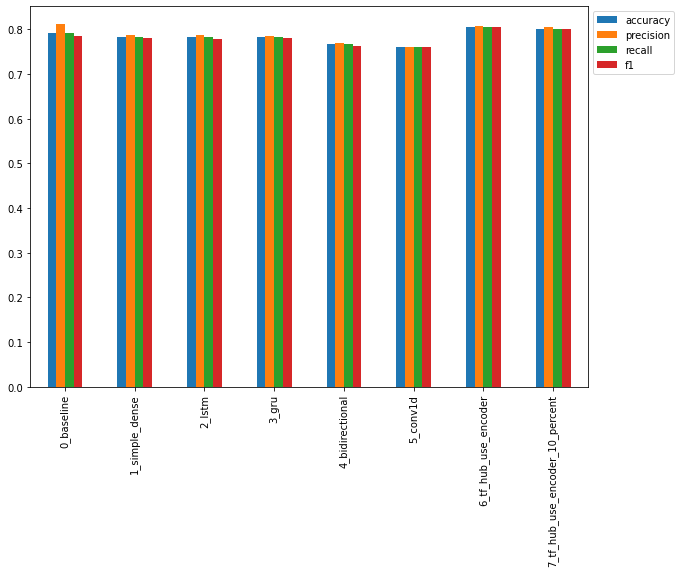

In [118]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

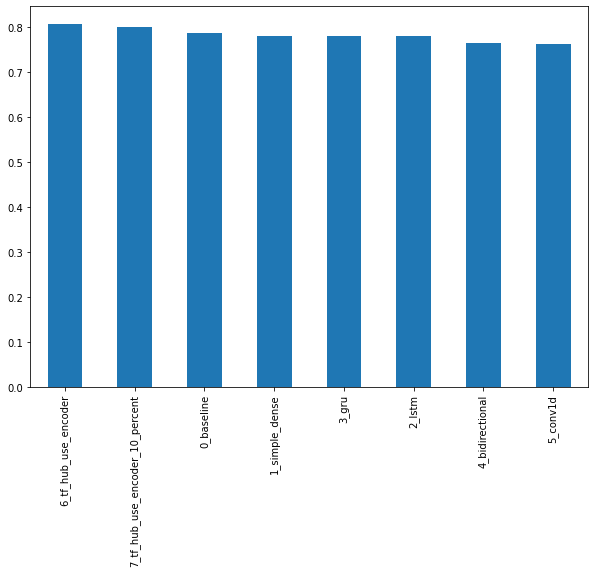

In [120]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

#Most the wrong exapmles

In [121]:
# Download a pretrained model from Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2022-07-15 08:01:57--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.20.128, 108.177.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  67.3MB/s    in 8.7s    

2022-07-15 08:02:06 (105 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.i

In [122]:
# Import previously trained model from Google Storage
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 10ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [123]:
# Make predictions with the loaded model from GS
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10] # these should be in label format

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [126]:
# Create DataFrame with validation sentences, validation labels and best performing model prediction labels + probabilities
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_pretrained_preds,
                       "pred_prob": tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
4955,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
584,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
7411,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
5950,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
5541,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [127]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10] # these are false positives

,text,target,pred,pred_prob
1206,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
578,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
4821,@noah_anyname That's where the concentration c...,0,1.0,0.852300
1186,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
6859,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
1195,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
6213,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
3991,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
6946,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
3226,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625
